In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

C:\Users\swathi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


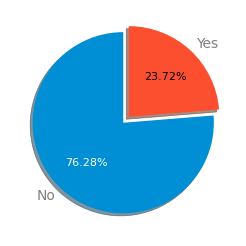

In [3]:
values = train.Is_Lead.value_counts()
labels = ['No', 'Yes']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

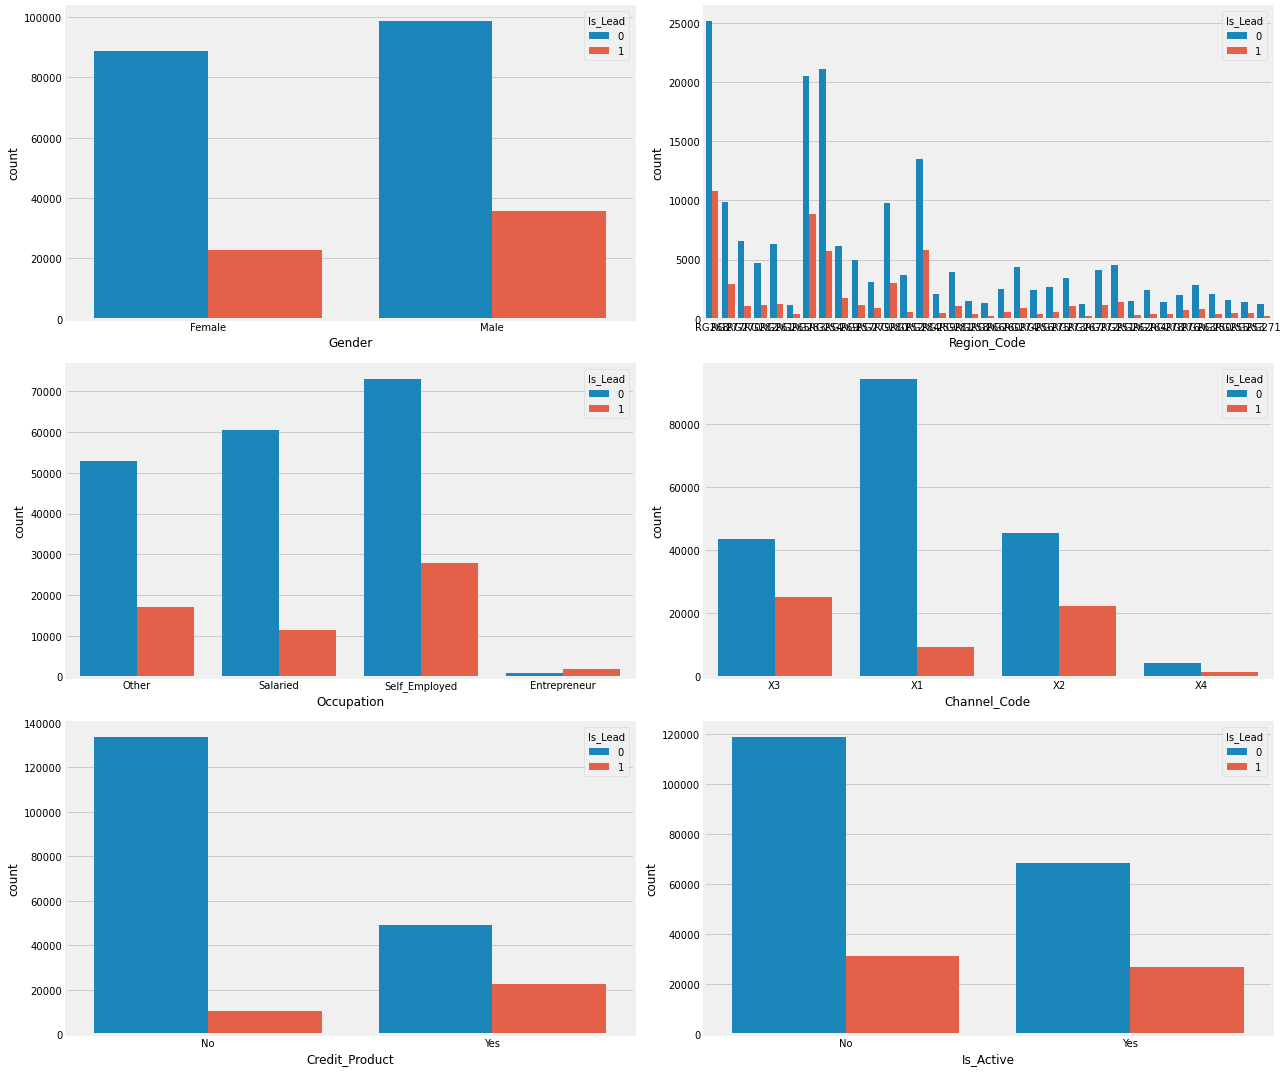

In [4]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Gender', hue = 'Is_Lead', data = train, ax = ax[0][0])
sns.countplot('Region_Code', hue = 'Is_Lead', data = train, ax = ax[0][1])
sns.countplot('Occupation', hue = 'Is_Lead', data = train, ax = ax[1][0])
sns.countplot('Channel_Code', hue = 'Is_Lead', data = train, ax = ax[1][1])
sns.countplot('Credit_Product', hue = 'Is_Lead', data = train, ax = ax[2][0])
sns.countplot('Is_Active', hue = 'Is_Lead', data = train, ax = ax[2][1])

plt.tight_layout()
plt.show()

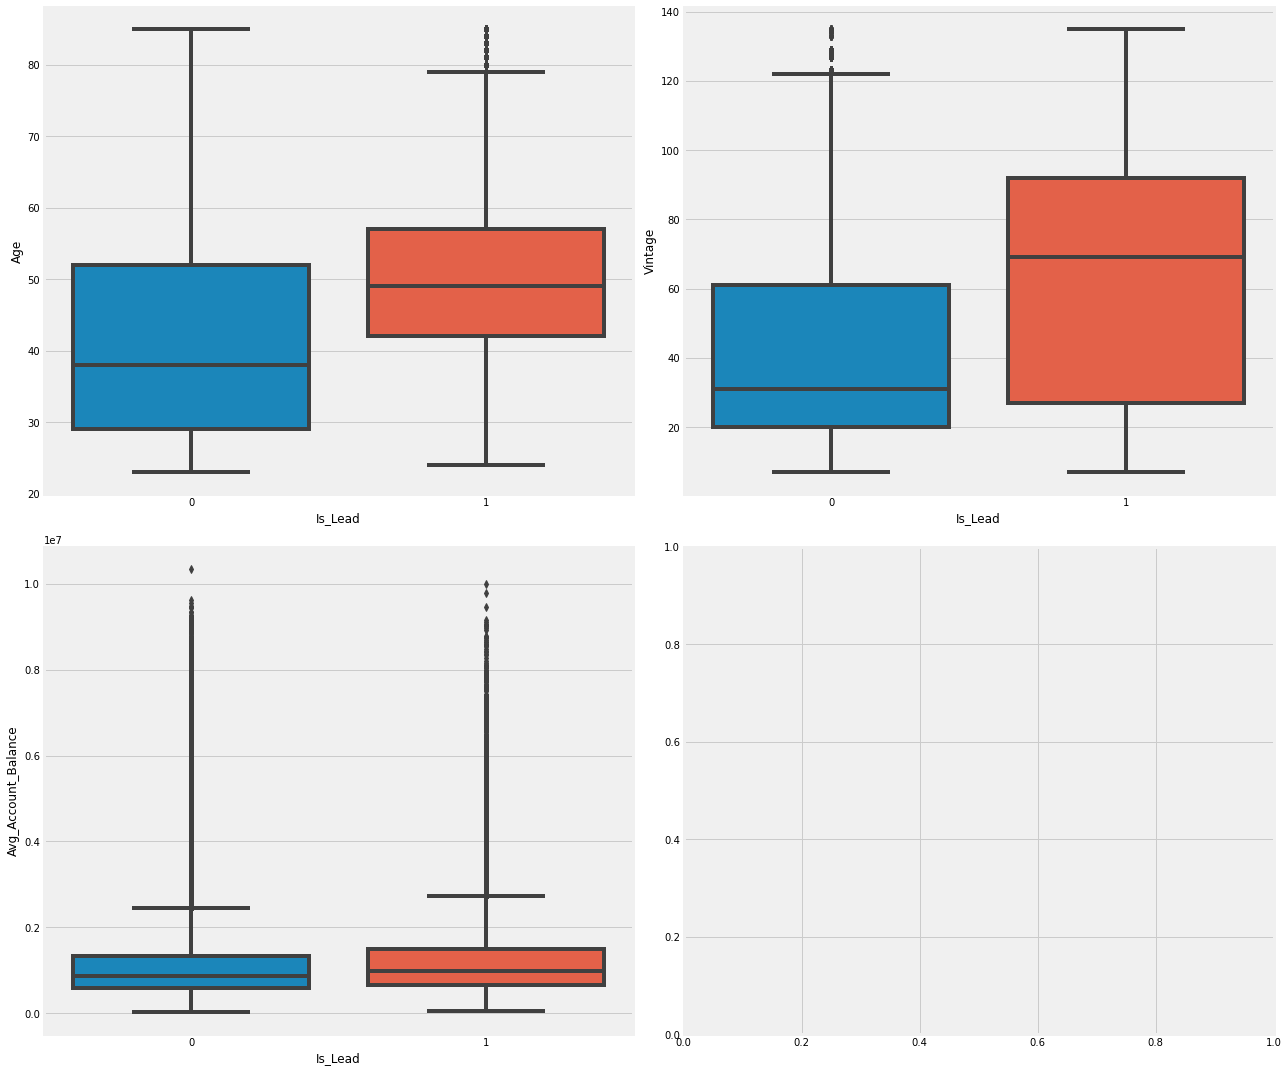

In [5]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (18, 15))

sns.boxplot(x = 'Is_Lead', y = 'Age', data = train, ax = ax[0][0])
sns.boxplot(x = 'Is_Lead', y = 'Vintage', data = train, ax = ax[0][1])
sns.boxplot(x = 'Is_Lead', y = 'Avg_Account_Balance', data = train, ax = ax[1][0])
plt.tight_layout()
plt.show()


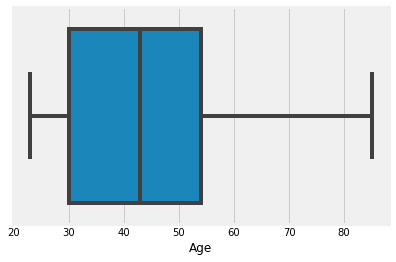

In [6]:
ax = sns.boxplot(x=train["Age"])

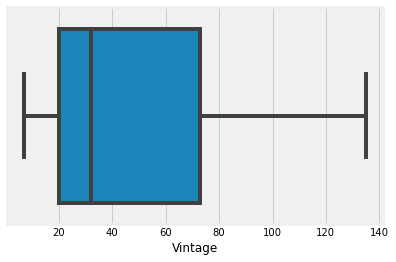

In [7]:
ax = sns.boxplot(x=train["Vintage"])

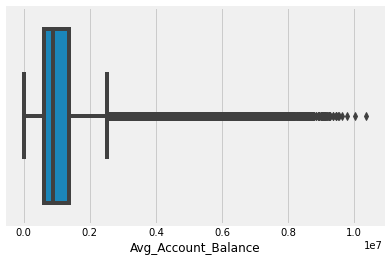

In [8]:
ax = sns.boxplot(x=train["Avg_Account_Balance"])

(array([57074., 38733., 20903., 31350., 35289., 27778., 13745.,  8487.,
         6872.,  5494.]),
 array([23. , 29.2, 35.4, 41.6, 47.8, 54. , 60.2, 66.4, 72.6, 78.8, 85. ]),
 <BarContainer object of 10 artists>)

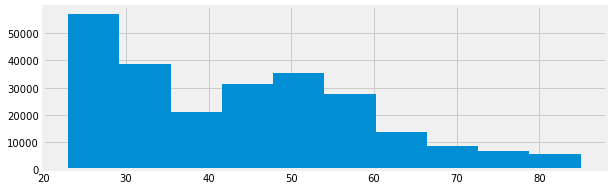

In [9]:
plt.figure(figsize=(9,3))
plt.hist(train.Age)

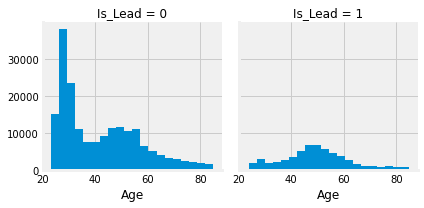

In [10]:
g = sns.FacetGrid(train, col='Is_Lead')
g.map(plt.hist, 'Age',bins=20)

In [11]:
print(train["Avg_Account_Balance"].quantile(0.99))

4472872.600000013


In [12]:
train["Avg_Account_Balance"].clip(upper = 4472872.600000013,inplace = True)

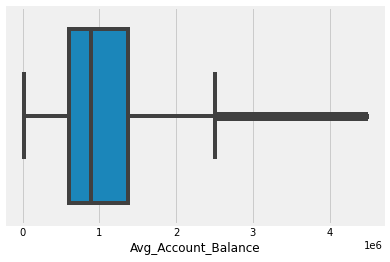

In [13]:
ax = sns.boxplot(x=train["Avg_Account_Balance"])

In [14]:
# dropping useless columns 
df = train.drop(columns = ['ID'], axis = 'columns')
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696.0,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988.0,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315.0,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454.0,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787.0,No,0


In [15]:
# Encoding categorical variables

df['Occupation'] = df['Occupation'].map({'Self_Employed' : 0, 'Salaried' : 1, 'Other' : 2, 'Entrepreneur':3})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})
df['Channel_Code'] = df['Channel_Code'].map({'X1' : 0, 'X3' : 1, 'X2' : 2, 'X4':3})
df['Credit_Product'] = df['Credit_Product'].map({'No' : 0, 'Yes' : 1})
df['Is_Active'] = df['Is_Active'].map({'No' : 0, 'Yes' : 1})

In [16]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['Region_Code'],return_df=True)
df=encoder.fit_transform(df) 
df.head()

,Gender,Age,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,0,0,0,0,0,0,1,2,1,43,0.0,1045696.0,0,0
1,1,30,0,0,0,0,0,1,0,1,0,32,0.0,581988.0,0,0
2,1,56,0,0,0,0,0,0,1,0,1,26,0.0,1484315.0,1,0
3,0,34,0,0,0,0,0,1,1,1,0,19,0.0,470454.0,0,0
4,1,30,0,0,0,0,1,0,0,1,0,33,0.0,886787.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0,51,0,0,0,1,1,1,0,0,1,109,NaN,1925586.0,0,0
245721,0,27,0,0,0,0,0,0,1,1,0,15,0.0,862952.0,1,0
245722,1,26,0,0,1,0,0,0,0,1,0,13,0.0,670659.0,0,0
245723,1,28,0,0,1,0,1,1,1,1,0,31,0.0,407504.0,0,0


In [17]:
train1 = df[df.Credit_Product.notnull()]
test1 = df[df.Credit_Product.isnull()]

In [18]:
X_train1 = train1.drop(["Credit_Product"],axis=1)
Y_train1 = train1["Credit_Product"]

In [19]:
X_test1 = test1.drop(["Credit_Product"], axis=1)# ytest need to be predicted

In [20]:
X_train1.head()

,Gender,Age,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead
0,1,73,0,0,0,0,0,0,1,2,1,43,1045696.0,0,0
1,1,30,0,0,0,0,0,1,0,1,0,32,581988.0,0,0
2,1,56,0,0,0,0,0,0,1,0,1,26,1484315.0,1,0
3,0,34,0,0,0,0,0,1,1,1,0,19,470454.0,0,0
4,1,30,0,0,0,0,1,0,0,1,0,33,886787.0,0,0


In [21]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train1, Y_train1)
Y_pred1 = decision_tree.predict(X_test1)

len(Y_pred1)

29325

In [22]:
df.Credit_Product[df.Credit_Product.isnull()] = Y_pred1

In [23]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code_0          0
Region_Code_1          0
Region_Code_2          0
Region_Code_3          0
Region_Code_4          0
Region_Code_5          0
Region_Code_6          0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [24]:
df2 = test.drop(columns = ['ID'], axis = 'columns')
df2.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [25]:
# Encoding categorical variables

df2['Occupation'] = df2['Occupation'].map({'Self_Employed' : 0, 'Salaried' : 1, 'Other' : 2, 'Entrepreneur':3})
df2['Gender'] = df2['Gender'].map({'Male' : 0, 'Female' : 1})
df2['Channel_Code'] = df2['Channel_Code'].map({'X1' : 0, 'X3' : 1, 'X2' : 2, 'X4':3})
df2['Credit_Product'] = df2['Credit_Product'].map({'No' : 0, 'Yes' : 1})
df2['Is_Active'] = df2['Is_Active'].map({'No' : 0, 'Yes' : 1})

In [26]:
df2=encoder.fit_transform(df2) 
df2

,Gender,Age,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,29,0,0,0,0,0,0,1,2,0,25,1.0,742366,0
1,0,43,0,0,0,0,0,1,0,2,2,49,NaN,925537,0
2,0,31,0,0,0,0,0,1,1,1,0,14,0.0,215949,0
3,0,29,0,0,0,0,1,0,0,2,0,33,0.0,868070,0
4,1,29,0,0,0,0,0,1,1,2,0,19,0.0,657087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,0,52,0,0,0,0,0,1,0,1,2,86,1.0,4242558,1
105308,0,55,0,0,0,1,0,0,1,2,2,86,1.0,1159153,0
105309,0,35,0,0,0,0,0,0,1,1,3,15,0.0,1703727,0
105310,0,53,0,0,0,0,0,0,1,2,1,93,0.0,737178,1


In [27]:
train2 = df2[df2.Credit_Product.notnull()]
test2 = df2[df2.Credit_Product.isnull()]

In [28]:
X_train2 = train2.drop(["Credit_Product"],axis=1)
Y_train2 = train2["Credit_Product"]

In [29]:
X_test2 = test2.drop(["Credit_Product"], axis=1)# ytest need to be predicted

In [30]:
decision_tree.fit(X_train2, Y_train2)
Y_pred2 = decision_tree.predict(X_test2)

len(Y_pred2)

12522

In [31]:
df2.Credit_Product[df2.Credit_Product.isnull()] = Y_pred2

In [32]:
df2.isnull().sum()

Gender                 0
Age                    0
Region_Code_0          0
Region_Code_1          0
Region_Code_2          0
Region_Code_3          0
Region_Code_4          0
Region_Code_5          0
Region_Code_6          0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [33]:
# creating features and label 
X = df.drop('Is_Lead', axis = 1)
y = df.Is_Lead

In [34]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [35]:
# Scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import model_selection

In [37]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'], 
              #'splitter': ['best', 'random'],
              'max_depth': [2,4,6,8,10,None],
              #'min_samples_split': [2,5,10,.03,.05],
              #'min_samples_leaf': [1,5,10,.03,.05], 
              #'max_features': [None, 'auto'], 
              'random_state': [0] 
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(X_train, y_train)

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

In [38]:
forest = RandomForestClassifier(n_jobs=-1, random_state = 0)

In [ ]:
#base model
forest_results = model_selection.cross_validate(forest, X_train, y_train, cv  = cv_split)
forest.fit(X_train, y_train)

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False], 'min_samples_split':[5,10]}]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'min_samples_split': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [ ]:
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [40]:
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=10,
                       n_estimators=25, n_jobs=-1, random_state=0)

In [41]:
RF = RandomForestClassifier(max_depth=10, max_features=10, n_estimators=25,min_samples_split=10,
                       n_jobs=-1, random_state=0)
RF.fit(X_train, y_train)
Y_pred = RF.predict(X_test)
acc_RF = round(RF.score(X_train, y_train) * 100, 2)
acc_RF

82.15

In [77]:
Y_pred.tofile('data2.csv', sep = ',')

In [62]:
data = pd.DataFrame(Y_pred, columns = ['Is_Lead'])

In [63]:
data.head()

,Is_Lead
0,0
1,0
2,0
3,0
4,0


In [68]:
data.Is_Lead.unique()

array([0, 1], dtype=int64)

In [69]:
res = df2.join(data.Is_Lead)

In [73]:
res.head()

,Gender,Age,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,29,0,0,0,0,0,0,1,2,0,25,1.0,742366,0,0.0
1,0,43,0,0,0,0,0,1,0,2,2,49,1.0,925537,0,0.0
2,0,31,0,0,0,0,0,1,1,1,0,14,0.0,215949,0,0.0
3,0,29,0,0,0,0,1,0,0,2,0,33,0.0,868070,0,0.0
4,1,29,0,0,0,0,0,1,1,2,0,19,0.0,657087,0,0.0


In [74]:
res=res.join(test.ID)

In [75]:
res = res[['ID','Is_Lead']]

In [47]:
res.head()

,ID,Is_Lead
0,VBENBARO,0.0
1,CCMEWNKY,0.0
2,VK3KGA9M,0.0
3,TT8RPZVC,0.0
4,SHQZEYTZ,0.0


In [48]:
res.to_csv('submission_file.csv')

In [49]:
res.shape

(105312, 2)

In [50]:
test.shape

(105312, 10)

In [76]:
res.isnull().sum()

ID             0
Is_Lead    43880
dtype: int64

In [64]:
data.isnull().sum()

Is_Lead    0
dtype: int64

In [65]:
data.to_csv('res.csv')

In [57]:
res = pd.read_csv('submission_file.csv')

In [58]:
res.head()

,Unnamed: 0,ID,Is_Lead
0,0,VBENBARO,0.0
1,1,CCMEWNKY,0.0
2,2,VK3KGA9M,0.0
3,3,TT8RPZVC,0.0
4,4,SHQZEYTZ,0.0


In [59]:
res.drop('Unnamed: 0', axis='columns',inplace=True)

In [60]:
res.head()

,ID,Is_Lead
0,VBENBARO,0.0
1,CCMEWNKY,0.0
2,VK3KGA9M,0.0
3,TT8RPZVC,0.0
4,SHQZEYTZ,0.0


In [61]:
res.isnull().sum()

ID             0
Is_Lead    43880
dtype: int64

In [ ]:
d